# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# Table of Contents

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## Explarotory Data Analysis

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 


After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load Dataset

- EN: In the dataset; there are customer ID numbers, gender, age, annual income, and a scoring of expenditures made by customers in the range of 1 to 100. Customers with low scores spend less, while those with high scores spend more.



- TR:Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [159]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Explore Data 

In [160]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)

In [161]:
df.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [5]:
column_names = df.columns

# Print the column names
print(column_names)

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')


### Statistical Check

In [6]:
df.isna().sum()[df.isna().sum() > 0] 
#Which shows us that there is no null data.

Series([], dtype: int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


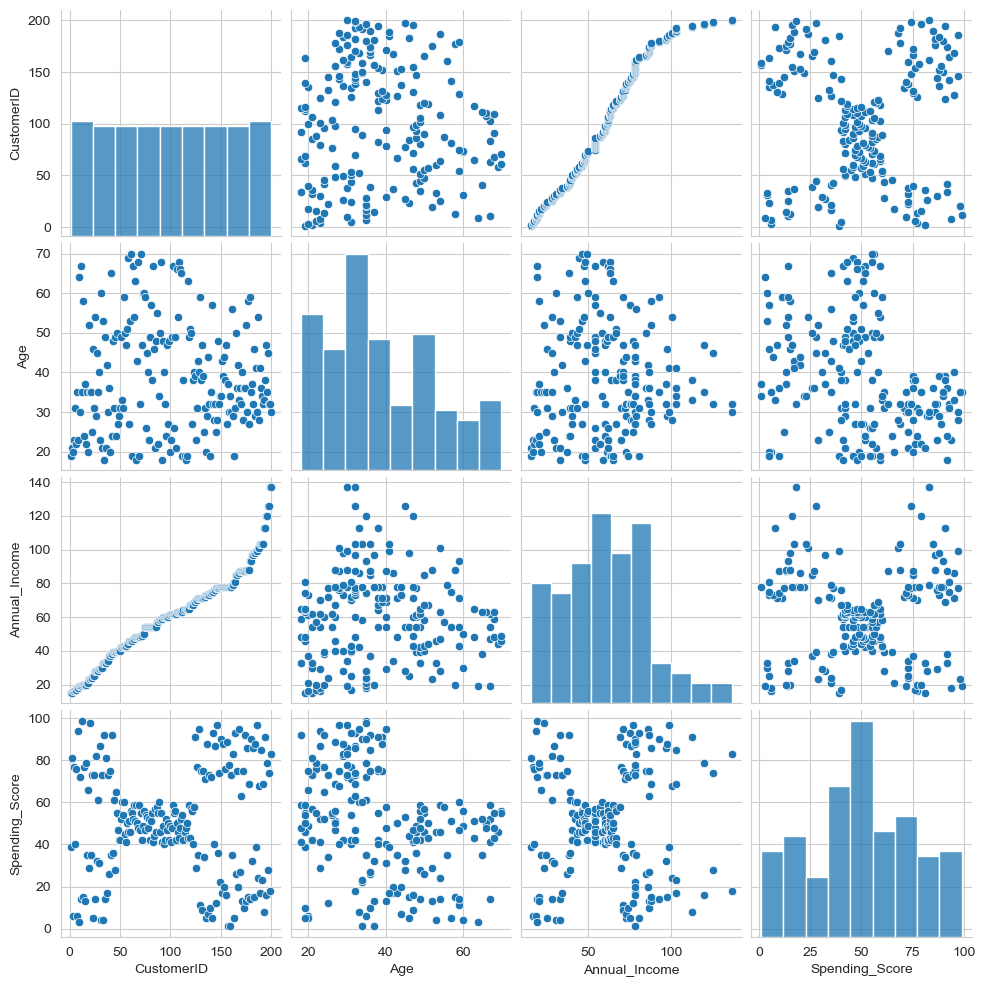

In [9]:
sns.pairplot(df);
#At first glance annual Income and Spending Score looks good for creation of clusters.

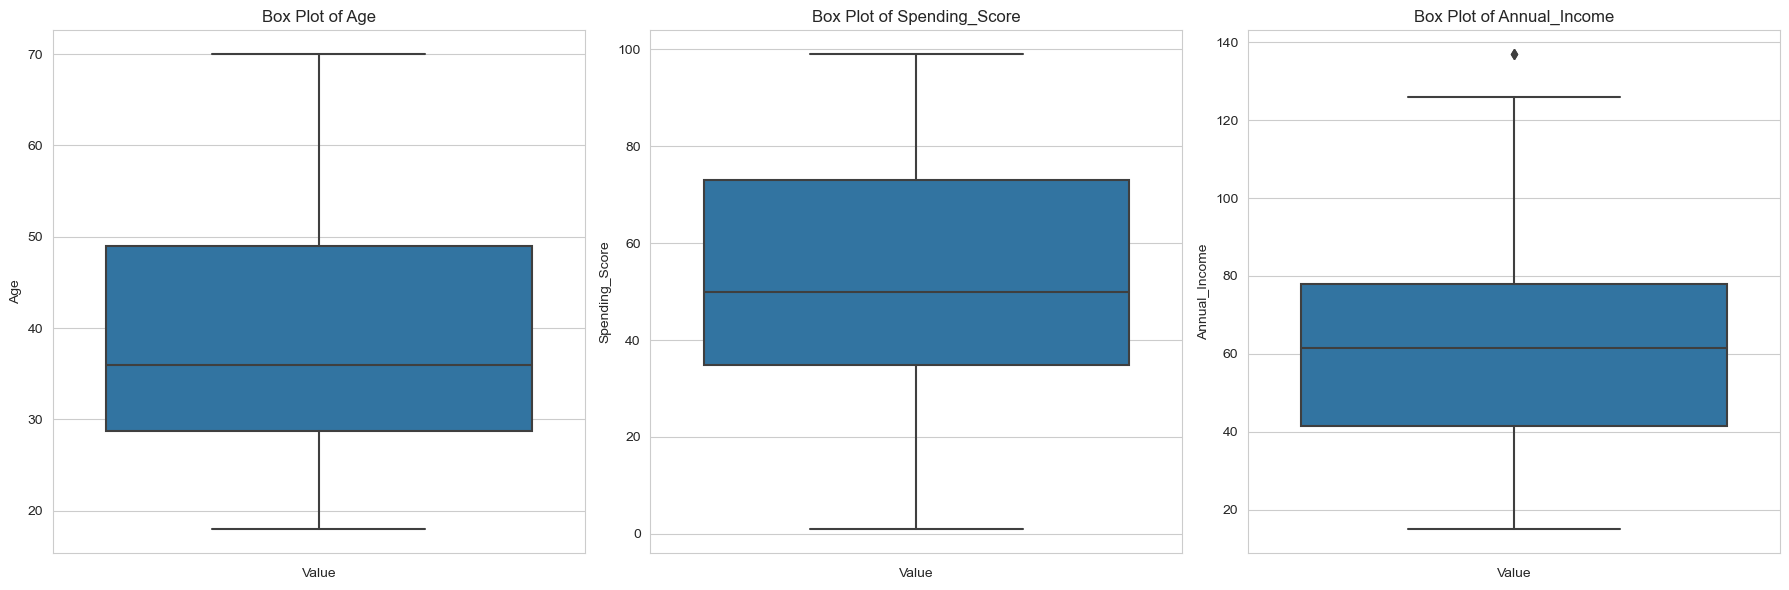

In [11]:
#With below box plots we see that there is almost no outliers in our dataset.

specific_columns = ["Age", "Spending_Score", "Annual_Income"]

plt.figure(figsize=(18, 6))

for i, col in enumerate(specific_columns, 1):
    plt.subplot(1, len(specific_columns), i)
    sns.boxplot(y=col, data=df, hue="Gender")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [162]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [13]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [163]:
X = df.copy() # there is no target label therefore all is labelled as X.

In [164]:
X.shape

(200, 5)

In [165]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)
# n_clusters : int, default=8
# The number of clusters to form as well as the number of centroids to generate.

In [166]:
K_means_model.fit_predict(X)

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [167]:
K_means_model.fit(X) ## 2. seçenek

KMeans(n_clusters=5, random_state=42)

In [168]:
K_means_model.labels_ # n_clusters=5 olduğu için 5 etiket olarak (clusters) yaptı ## Fit ayrı verilirse predict olarak çalıştırma bu şekilde çalıştır

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [169]:
X["Classes"] = K_means_model.labels_ # Add these labels into df

In [170]:
X

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male,Classes
0,1,19,15,39,1,1
1,2,21,15,81,1,1
2,3,20,16,6,0,4
3,4,23,16,77,0,1
4,5,31,17,40,0,4
...,...,...,...,...,...,...
195,196,35,120,79,0,0
196,197,45,126,28,0,3
197,198,32,126,74,1,0
198,199,32,137,18,1,3


In [175]:
clus_pred_X = X.groupby("Classes").mean().T
clus_pred_X

Classes,0,1,2,3,4
CustomerID,162.000000,23.041667,93.046154,164.000000,35.472222
Age,32.692308,25.250000,42.969231,40.805556,45.194444
Annual_Income,86.538462,25.833333,57.938462,87.916667,32.944444
Spending_Score,82.128205,76.916667,49.446154,17.888889,31.472222
Gender_Male,0.461538,0.416667,0.430769,0.527778,0.361111


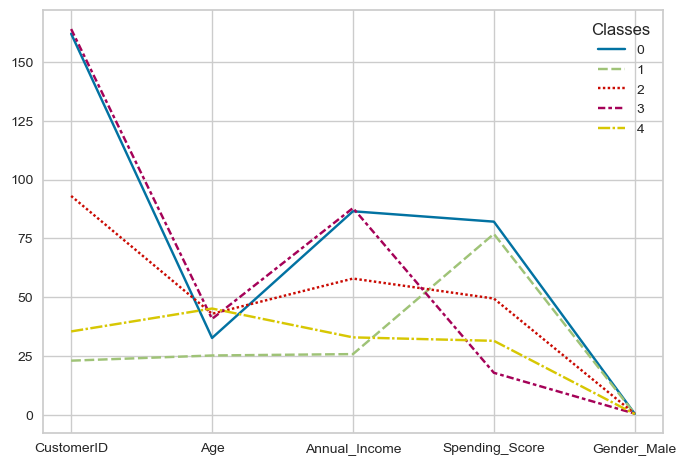

In [177]:
sns.lineplot(data = clus_pred_X);
#Customer ID must be dropped in the first steps!!

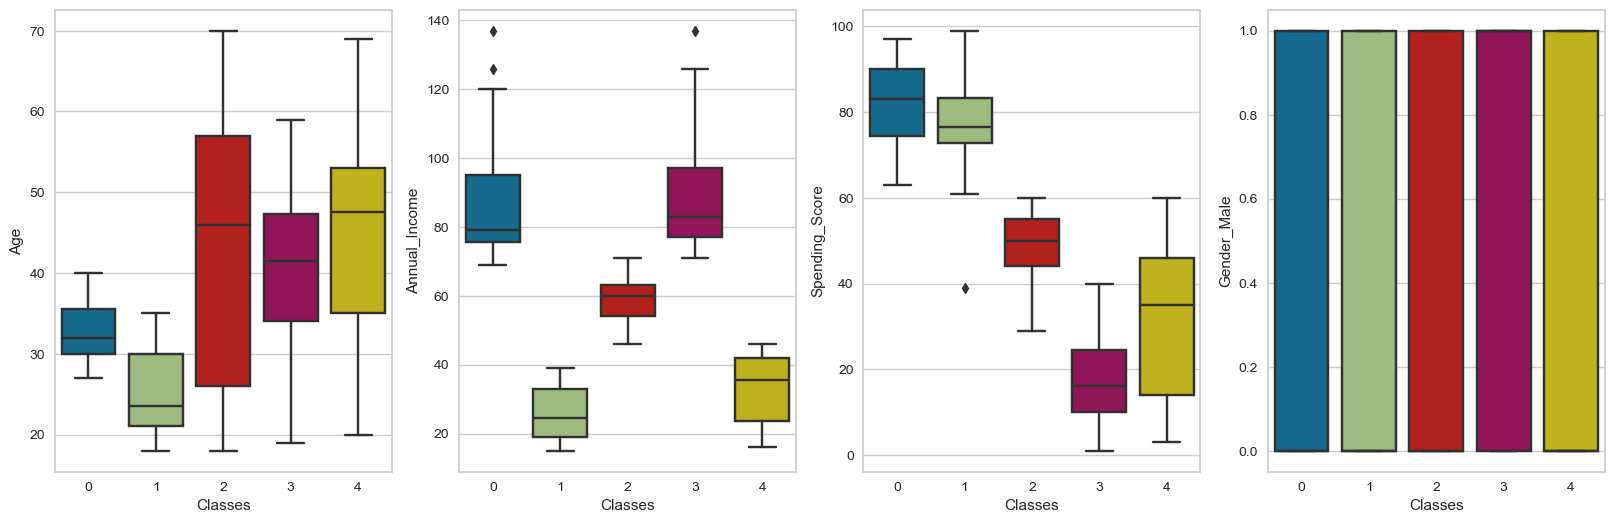

In [174]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "Classes", data = X)

plt.subplot(142)
sns.boxplot(y = "Annual_Income", x = "Classes", data = X)

plt.subplot(143)
sns.boxplot(y = "Spending_Score", x = "Classes", data = X)

plt.subplot(144)
sns.boxplot(y = "Gender_Male", x = "Classes", data = X);

## 4.Hopkins Test

In [22]:
X = X.drop("Classes", axis =1)

In [23]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [26]:
hopkins(df, df.shape[0])

0.16357085959431575

- If the Hopkins statistic is close to 0, it suggests that the data points are randomly distributed and do not exhibit any significant cluster structure. Good to use some clustering methods.

- If the Hopkins statistic is close to 1, it indicates that the data points are clustered together and have a meaningful cluster structure. If above 0.3 using clustering could not make sense.





- In our case, the Hopkins test result is approximately 0.169. This value is closer to 0 than to 1, which suggests that the data points in your dataset are more randomly distributed and do not exhibit a strong cluster tendency. Very good for clustering.

## 5.Choosing The Optimal Number of Clusters

### Elbow Method

**Inertia (Kümeler İçi Toplam Kareler):** Inertia, her veri noktasının küme merkezine olan uzaklığının karesinin toplamıdır. Düşük bir inertia değeri, veri noktalarının kendi küme merkezlerine daha yakın olduğunu gösterir, bu da genellikle iyi bir kümeleme olduğunu düşündürebilir. Ancak, inertia değeri, kümelerin sayısı arttıkça genellikle azalır. Bu nedenle, farklı küme sayıları için inertia değerlerini karşılaştırarak en uygun küme sayısını seçmek zordur.

In [27]:
ssd = [] ##inertia

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

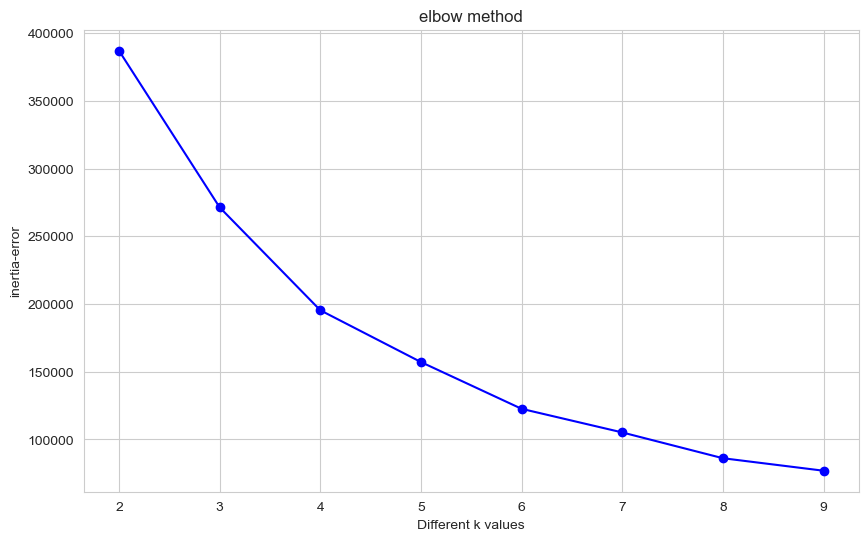

In [28]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [29]:
ssd # sum of squared distance

[387065.7137713771,
 271396.5629660315,
 195401.19855991466,
 157157.75790598287,
 122625.38919480512,
 105192.97703222702,
 86146.21762410295,
 76917.61588179087]

In [30]:
pd.Series(ssd).diff() # sadece DataFrame serieste çalışır. index sırasına göre satırların farkını alır. Bu skorlara oransal olarak bakılmalı. Aksi halde yanıl

0              NaN
1   -115669.150805
2    -75995.364406
3    -38243.440654
4    -34532.368711
5    -17432.412163
6    -19046.759408
7     -9228.601742
dtype: float64

In [31]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,115669.150805
3,75995.364406
4,38243.440654
5,34532.368711
6,17432.412163
7,19046.759408
8,9228.601742


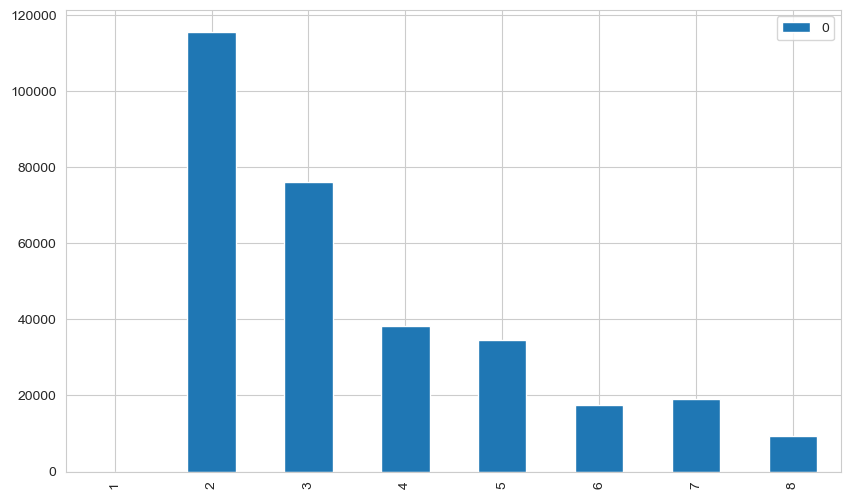

In [32]:
df_diff.plot(kind='bar');

### 2'nci Method n_cluster tespiti için - Yellowbrick Library

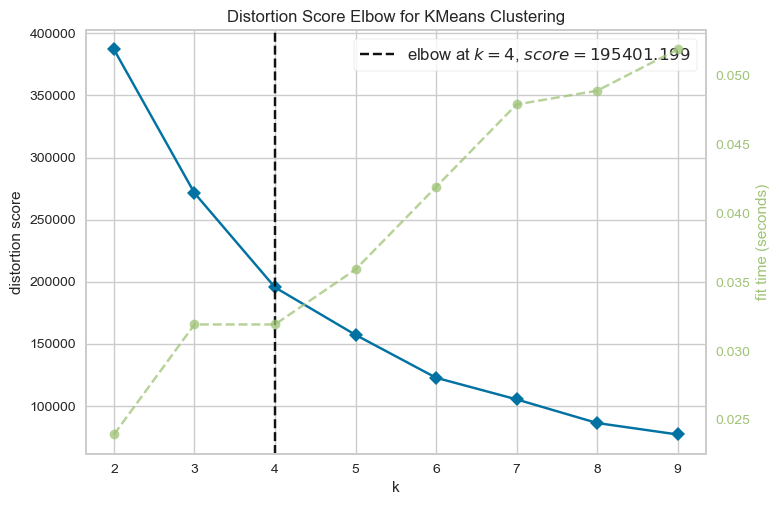

In [33]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

Silhouette analizi, kümeleme performansını değerlendirmek için kullanılan bir metriktir. Küme içi benzerliği ve kümeler arası benzerliği karşılaştırarak, kümelerin ne kadar iyi ayrıldığını gösterir. Silhouette değeri, her veri noktası için hesaplanır ve bu değerlerin ortalaması alınarak genel bir kümeleme kalitesi ölçümü elde edilir.

Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümesinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki küme arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümeye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (genellikle 0.5'ten büyük) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

Silhouette, veri kümeleri içindeki tutarlılığın yorumlanması ve doğrulanması yöntemini ifade eder. Teknik, her bir nesnenin ne kadar iyi sınıflandırıldığının kısa ve öz bir grafik temsilini sağlar. Siluet değeri, bir nesnenin diğer kümelere kıyasla kendi kümesine ne kadar benzediğinin bir ölçüsüdür.

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(X, K_means_model.labels_)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4793049017423563
For n_clusters=3, the silhouette score is 0.3766801400675223
For n_clusters=4, the silhouette score is 0.42245261332521894
For n_clusters=5, the silhouette score is 0.42309497779166094
For n_clusters=6, the silhouette score is 0.409528091044574
For n_clusters=7, the silhouette score is 0.40377132272288846
For n_clusters=8, the silhouette score is 0.40572559890744303


Siluet Skoru: Görselde her bir veri noktası için bir siluet değeri (katsayı) vardır. Bu değerler -1 ile 1 arasında değişir. 1'e yakın değerler iyi bir kümelemeyi, 0'a yakın değerler bir kümse sınırına yakın olan veri noktalarını ve -1'e yakın değerler ise yanlış bir kümseye atanmış veri noktalarını gösterir.

Kümelerin Boyutu: Görselde her küme için bir siluet grafiği vardır. Bu grafikler, kümelerin ne kadar homojen olduğunu ve kümeler arasındaki ayrımın ne kadar belirgin olduğunu gösterir.

Kırmızı Noktalı Çizgi: Bu çizgi, tüm veri noktaları için ortalama siluet skorunu gösterir. Bu çizginin üzerindeki kümeler genellikle iyi bir performansı gösterirken, bu çizginin altındaki kümeler daha düşük bir performansı gösterir.

Küme Genişlikleri: Her bir küme için siluet genişliği, o kümeye ait veri noktalarının siluet katsayılarını gösterir. Eğer tüm kümeler benzer genişliklere sahipse, bu, kümelerin benzer yoğunlukta ve boyutta olduğunu gösterir. Farklı genişliklerde kümeler, kümelerin boyut ve yoğunluklarının farklı olduğunu gösterir.

SilhouetteVisualizer'ı yorumlarken dikkat edilmesi gerekenler:

- Geniş siluetler (1'e yakın değerler) iyi bir kümeleme performansını gösterir.

- Dar veya negatif değerlere sahip siluetler, bu veri noktalarının muhtemelen yanlış kümeye atandığını gösterir.

- Eğer birçok veri noktası ortalama siluet skorunun (kırmızı noktalı çizgi) altındaysa, bu kümse sayısının gözden geçirilmesi gerektiğini gösterebilir.

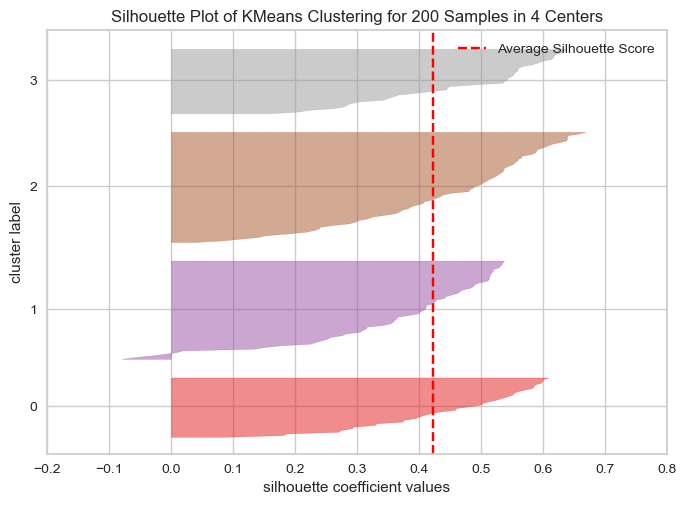

In [67]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

- Based on above investigations we see that best n_cluster is 4. 
- This investigation is being always done with inertia value which was received in elbow method.

In [68]:
X.head(2)

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1


### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [69]:
df.head(2)

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1


In [70]:
df_X1 = df.drop(["CustomerID", "Gender_Male", "Annual_Income"], axis=1)

In [71]:
X1 = df_X1

In [72]:
X1.head(2)

,Age,Spending_Score
0,19,39
1,21,81


#### *ii. Determine optimal number of clusters*

In [73]:
ssd = [] ##inertia

K = range(2,10)

for k in K:
    model_X1 = KMeans(n_clusters =k, random_state=42)
    model_X1.fit(X1)
    ssd.append(model_X1.inertia_)

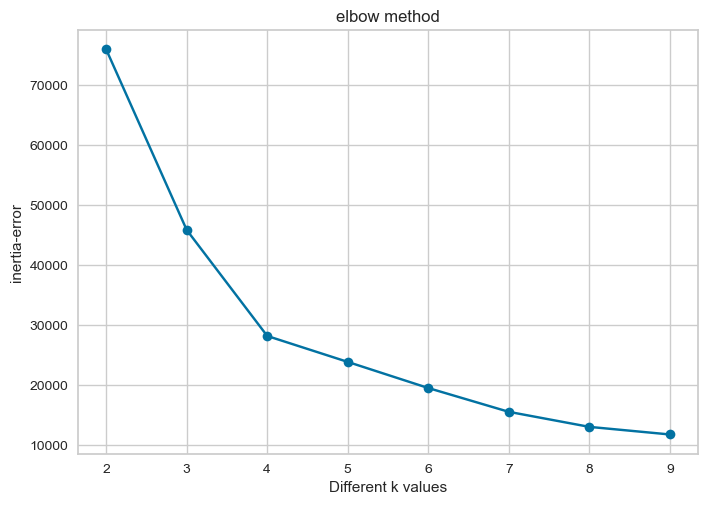

In [74]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [75]:
hopkins(X1, X1.shape[0])

0.3103927333747036

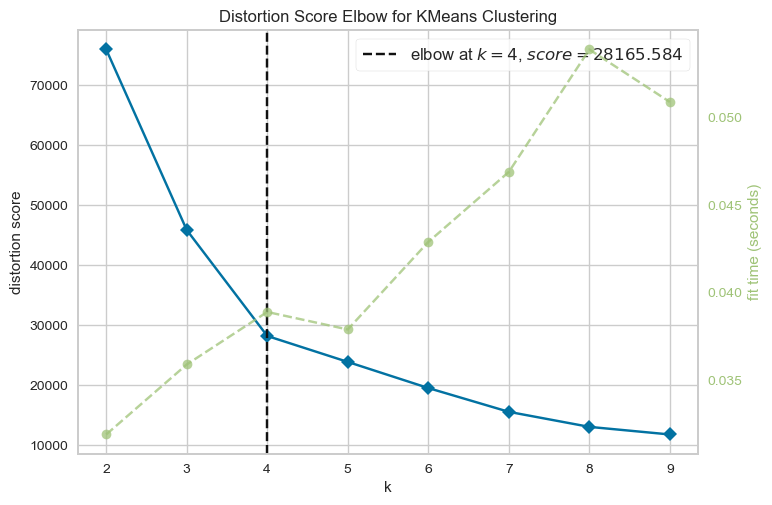

In [76]:
from yellowbrick.cluster import KElbowVisualizer

model_X1_yellow = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_X1_yellow, k=(2,10))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

In [77]:
silhouette_score(X1, K_means_model.labels_)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [78]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


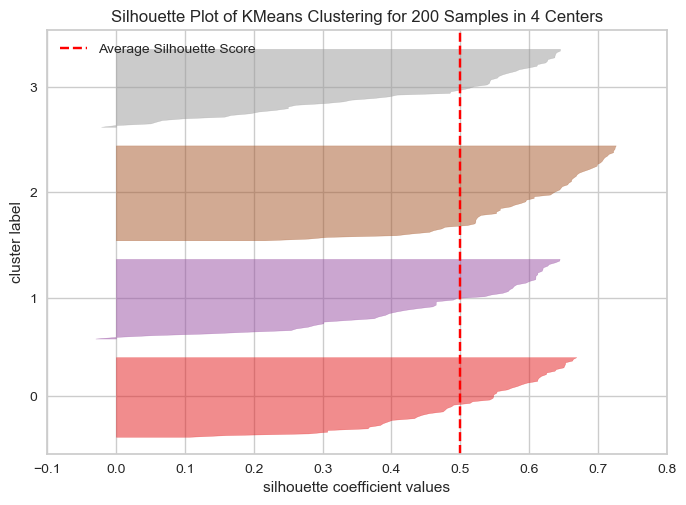

In [79]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_X1_yellowbrickcluster = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_X1_yellowbrickcluster)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

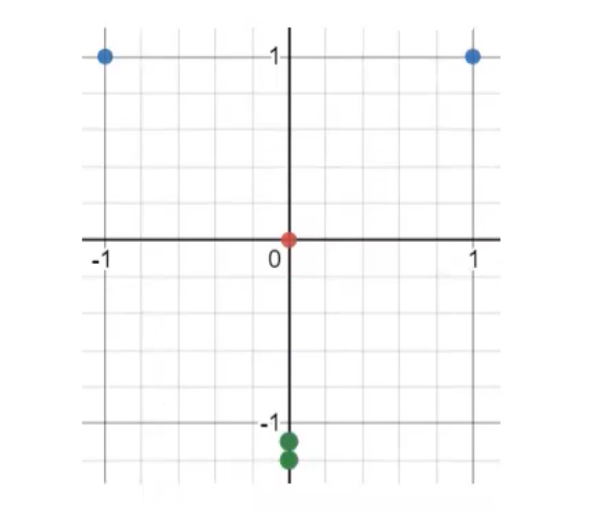

__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
data_scaled_X1 = scaler.fit_transform(X1)

In [82]:
num_clusters = 4

In [83]:
kmeans_X1 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_X1.fit(data_scaled_X1)

KMeans(n_clusters=4, random_state=42)

In [84]:
X1["Cluster"] = kmeans_X1.labels_

In [99]:
silhouette_score(X1, kmeans_X1.labels_)

0.47624239333718804

#### *iv. Visualizing and Labeling All the Clusters*

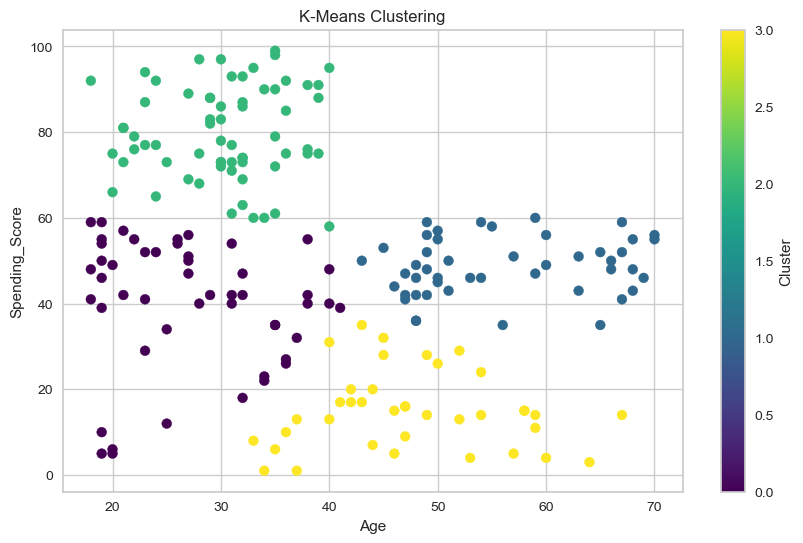

In [85]:
# Choose two features for the scatter plot
feature1 = "Age"
feature2 = "Spending_Score"

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X1[feature1], X1[feature2], c=X1["Cluster"], cmap="viridis", s=50)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

### Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

In [86]:
df_X2 = df.drop(["CustomerID", "Gender_Male", "Age"], axis=1)

In [87]:
X2 = df_X2

In [88]:
X2.head(2)

,Annual_Income,Spending_Score
0,15,39
1,15,81


#### *ii. Determine optimal number of clusters*

In [90]:
ssd = [] ##inertia

K = range(2,10)

for k in K:
    model_X2 = KMeans(n_clusters =k, random_state=42)
    model_X2.fit(X2)
    ssd.append(model_X2.inertia_)

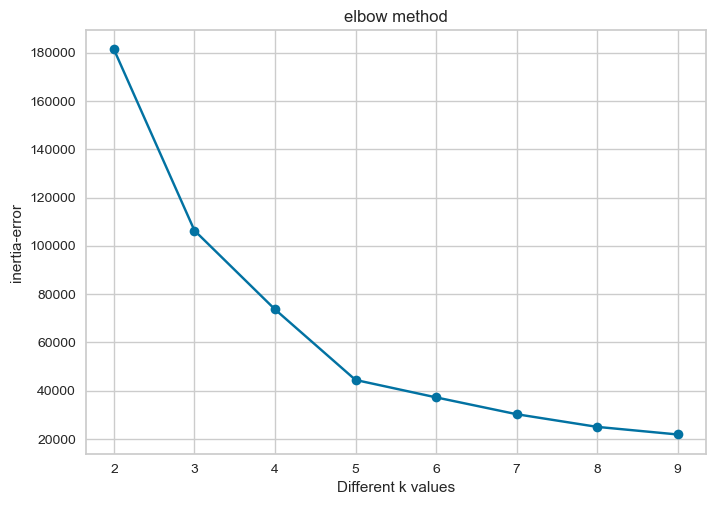

In [91]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [92]:
hopkins(X2, X2.shape[0])

0.3279163856241762

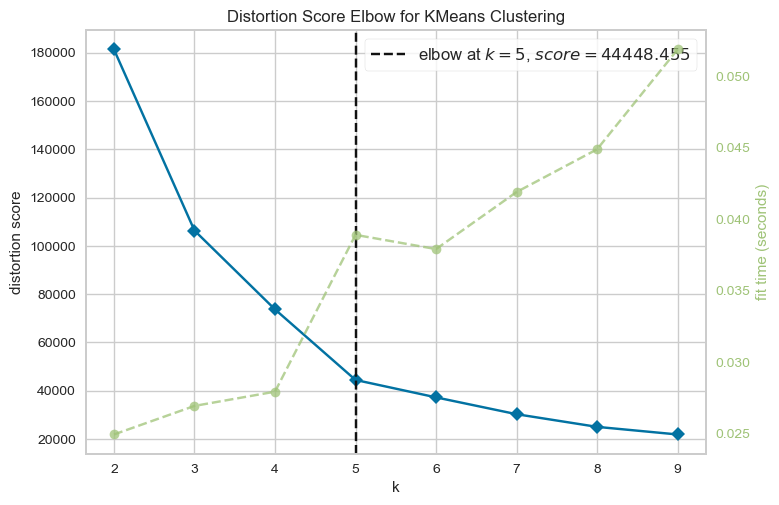

In [93]:
from yellowbrick.cluster import KElbowVisualizer

model_X2_yellow = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_X2_yellow, k=(2,10))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [94]:
from sklearn.metrics import silhouette_score

In [100]:
silhouette_score(X2, K_means_model.labels_)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [101]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


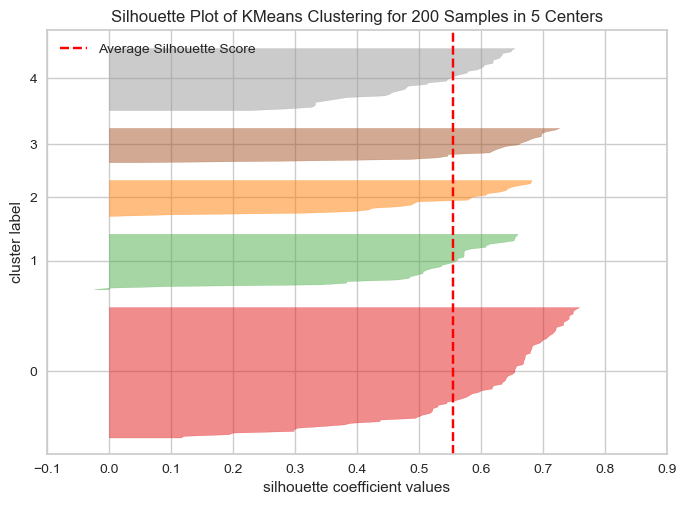

In [151]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_X2_yellowbrickcluster = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model_X2_yellowbrickcluster)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

-  This time best cluster number is 5 in in light of above study.

#### *iii. Apply K Means*

In [103]:
X2.head(2)

,Annual_Income,Spending_Score
0,15,39
1,15,81


In [108]:
scaler = StandardScaler()
data_scaled_X2 = scaler.fit_transform(X2)

In [105]:
num_clusters = 5

In [106]:
kmeans_X2 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_X2.fit(data_scaled_X2)

KMeans(n_clusters=5, random_state=42)

In [107]:
X2["Cluster"] = kmeans_X2.labels_

In [109]:
silhouette_score(X2, kmeans_X2.labels_)

0.5552538794032924

#### *iv. Visualizing and Labeling All the Clusters*

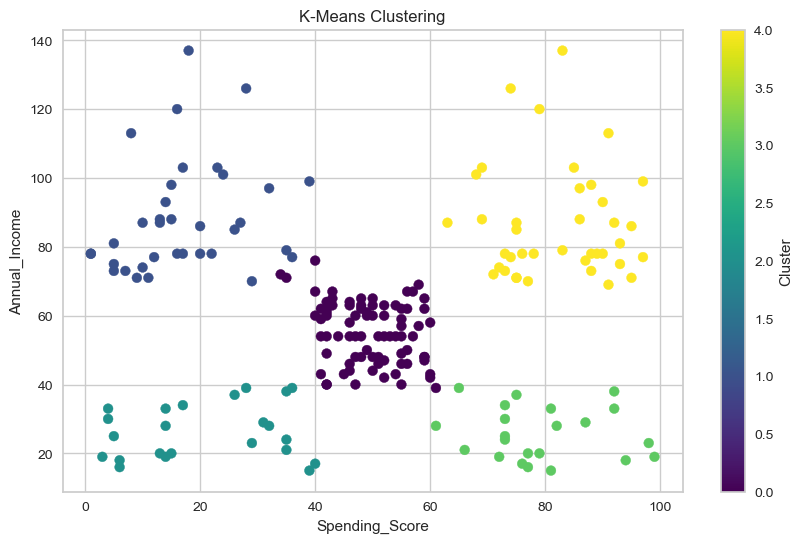

In [110]:
# Choose two features for the scatter plot
feature1 = "Spending_Score"
feature2 = "Annual_Income"

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X2[feature1], X2[feature2], c=X2["Cluster"], cmap="viridis", s=50)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.

In [152]:
X.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [112]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

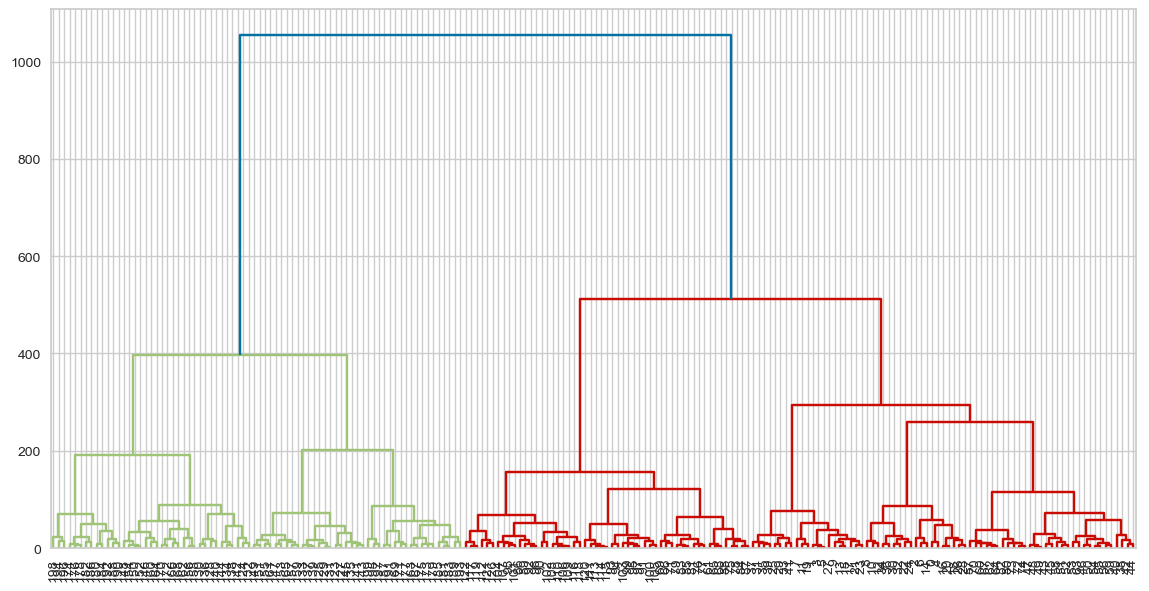

In [113]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

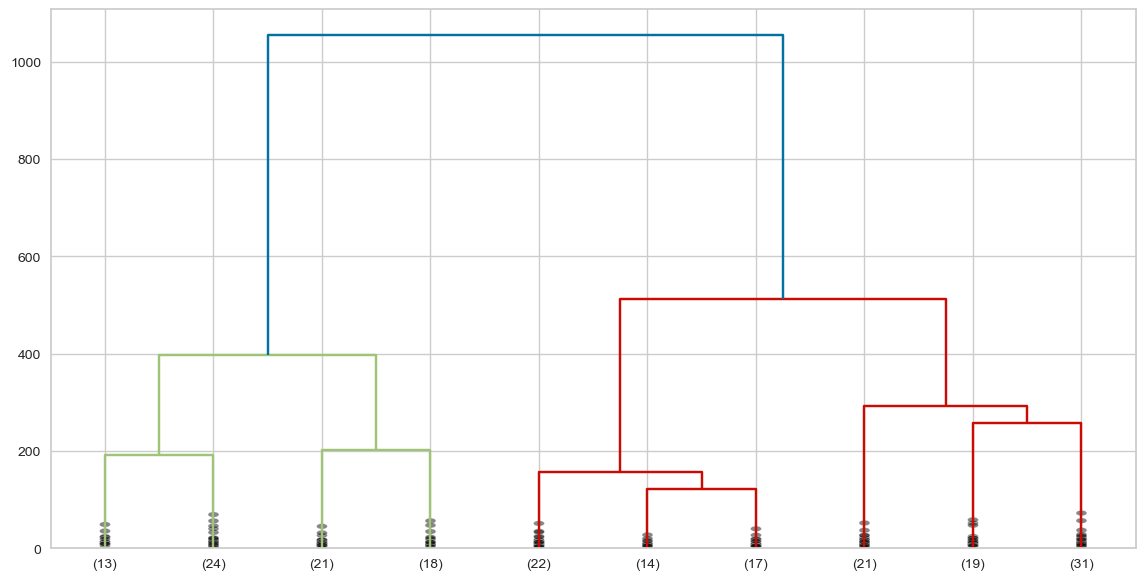

In [114]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

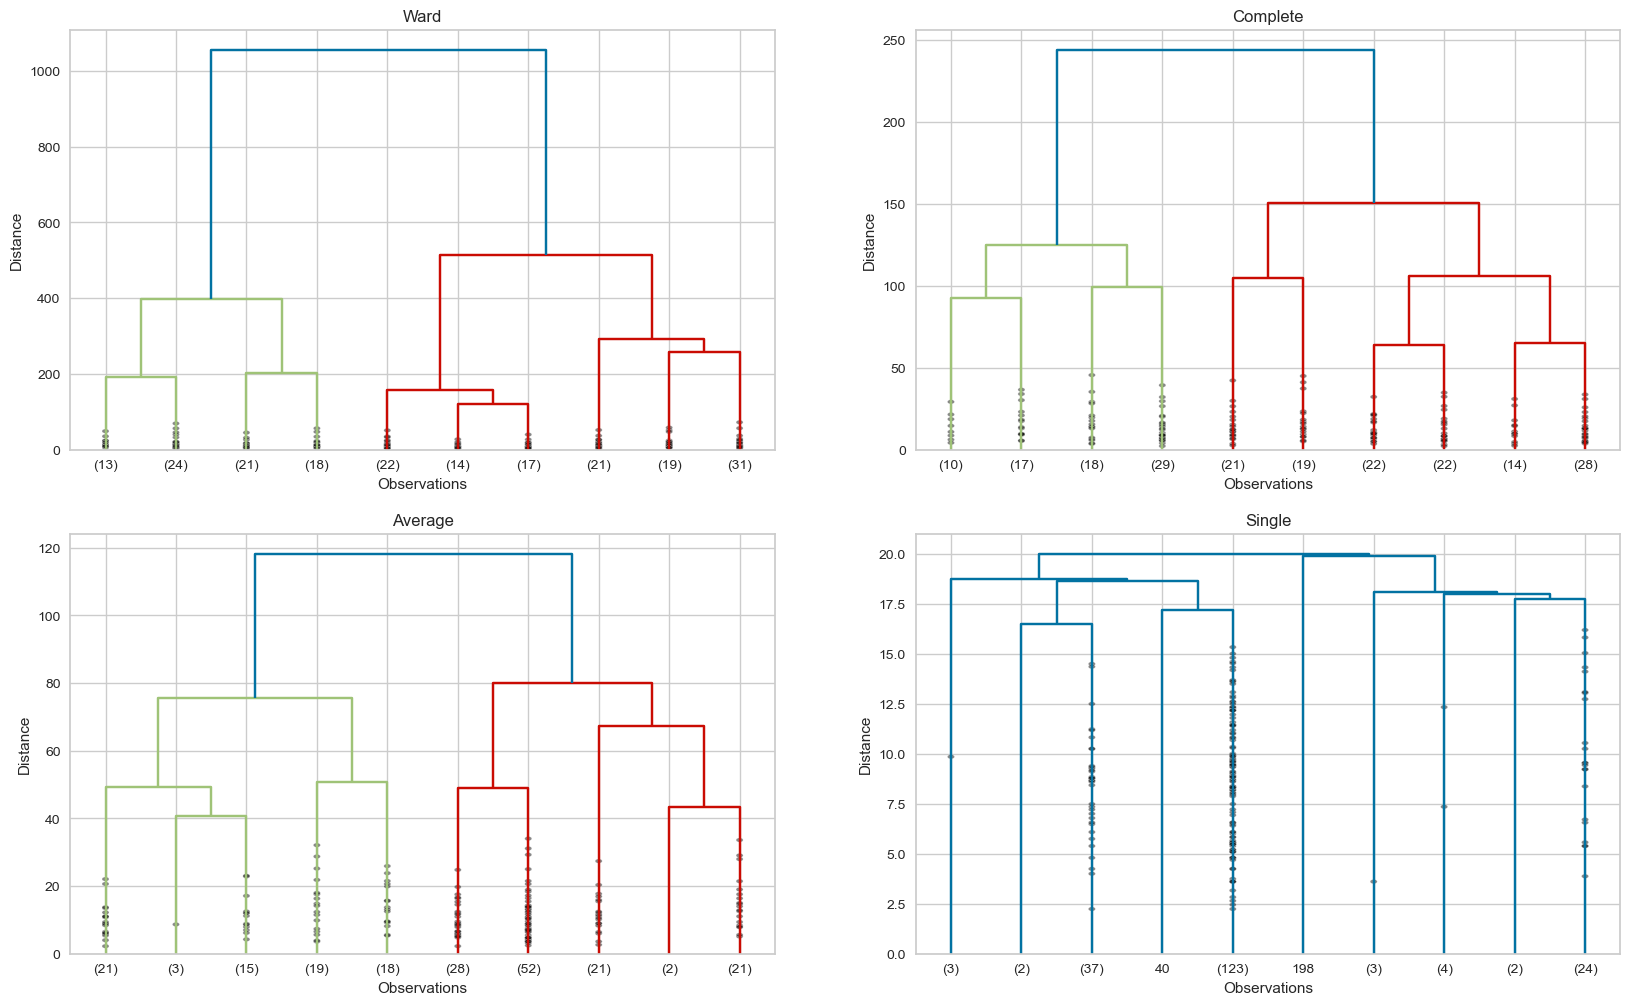

In [115]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

It seems that best number for cluster is 2.

### Clustering based on Age and Spending Score- X1

In [116]:
X1.head(2)

,Age,Spending_Score,Cluster
0,19,39,0
1,21,81,2


In [117]:
X1 = df_X1.drop(["Cluster"], axis=1)

In [118]:
X1.head(2)

,Age,Spending_Score
0,19,39
1,21,81


In [119]:
hc_ward_X1 = linkage(y = X1, method = "ward")
hc_complete_X1 = linkage(X1, "complete")
hc_average_X1 = linkage(X1, "average")
hc_single_X1 = linkage(X1, "single")

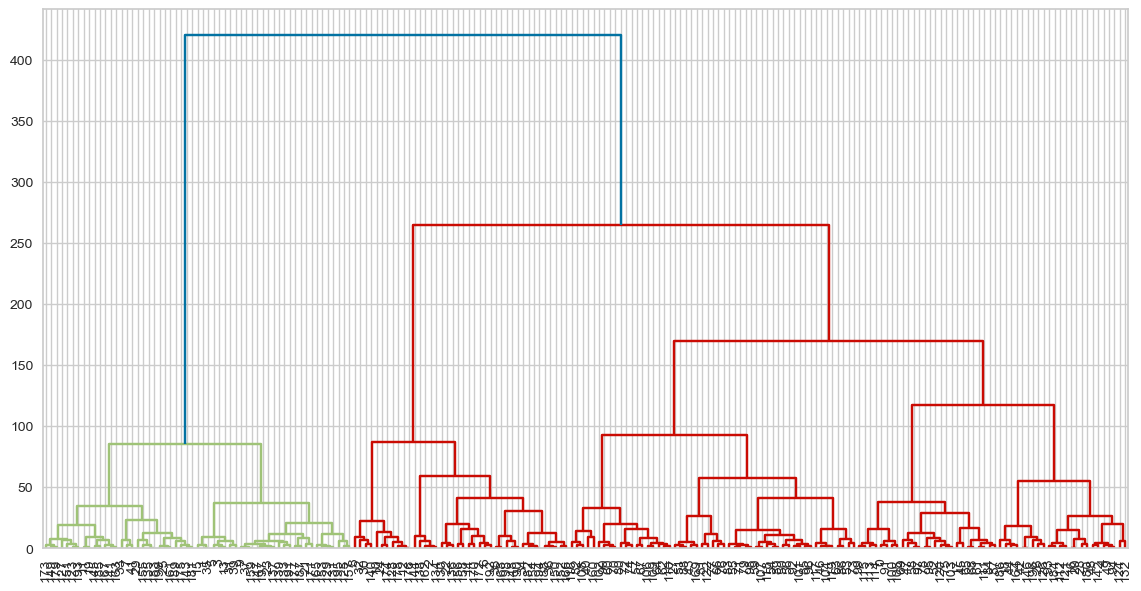

In [120]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward_X1, leaf_font_size = 10);

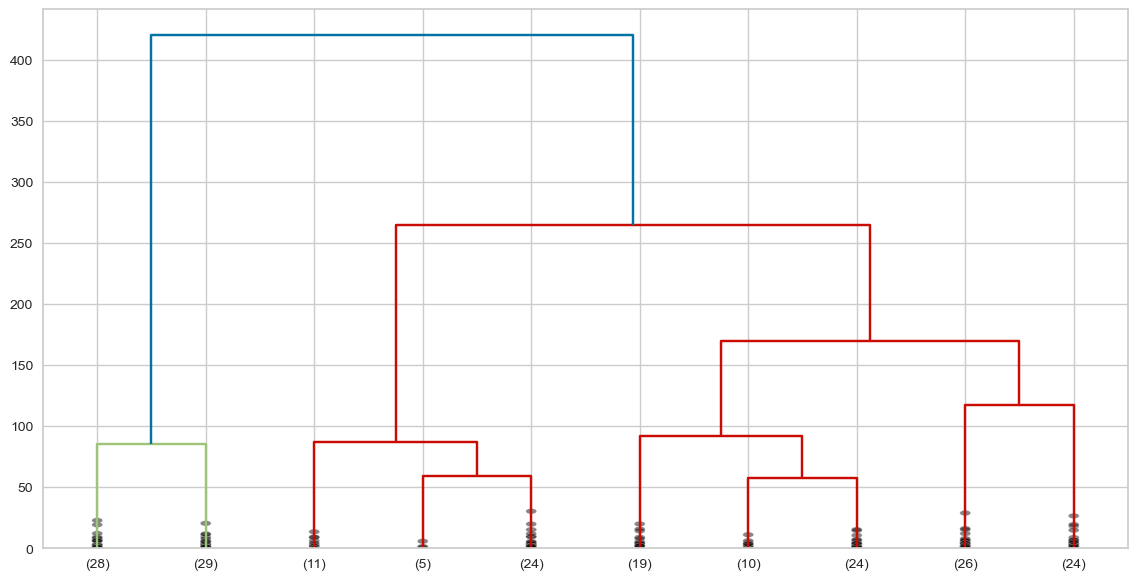

In [121]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward_X1,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

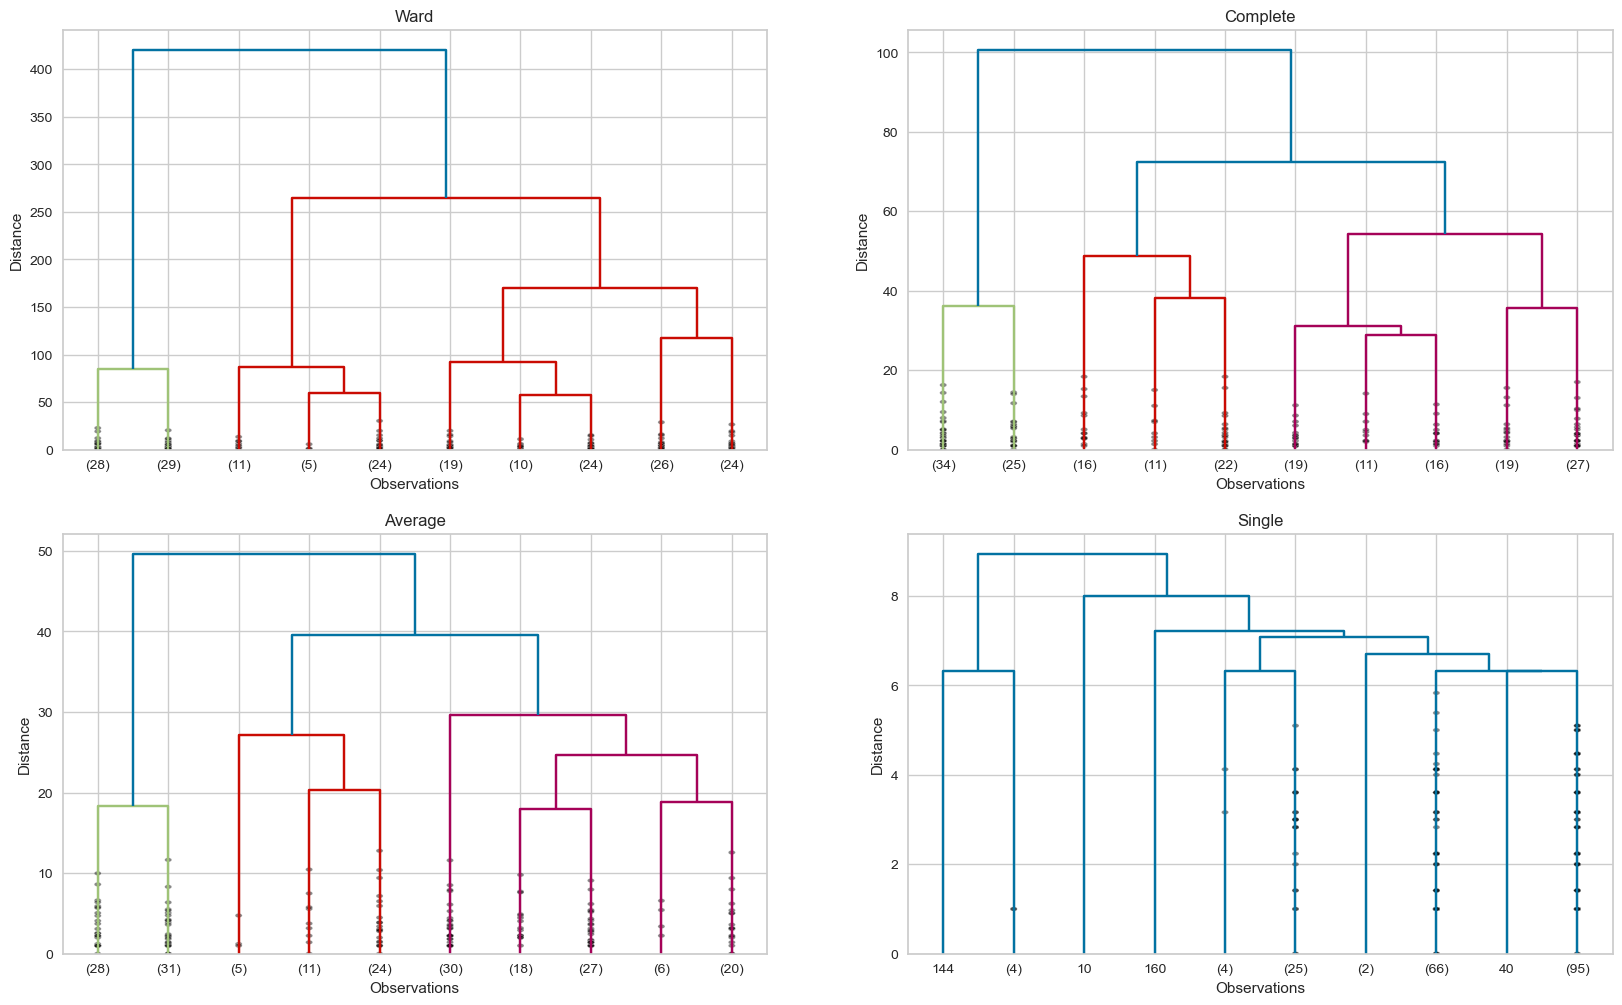

In [122]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_X1, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete_X1, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average_X1, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single_X1, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

It gave us 3

### Clustering based on Annual Income and Spending Score- X2

In [123]:
X2.head(2)

,Annual_Income,Spending_Score,Cluster
0,15,39,2
1,15,81,3


In [124]:
X2 = df_X2.drop(["Cluster"], axis=1)

In [125]:
hc_ward_X2 = linkage(y = X2, method = "ward")
hc_complete_X2 = linkage(X2, "complete")
hc_average_X2 = linkage(X2, "average")
hc_single_X2 = linkage(X2, "single")

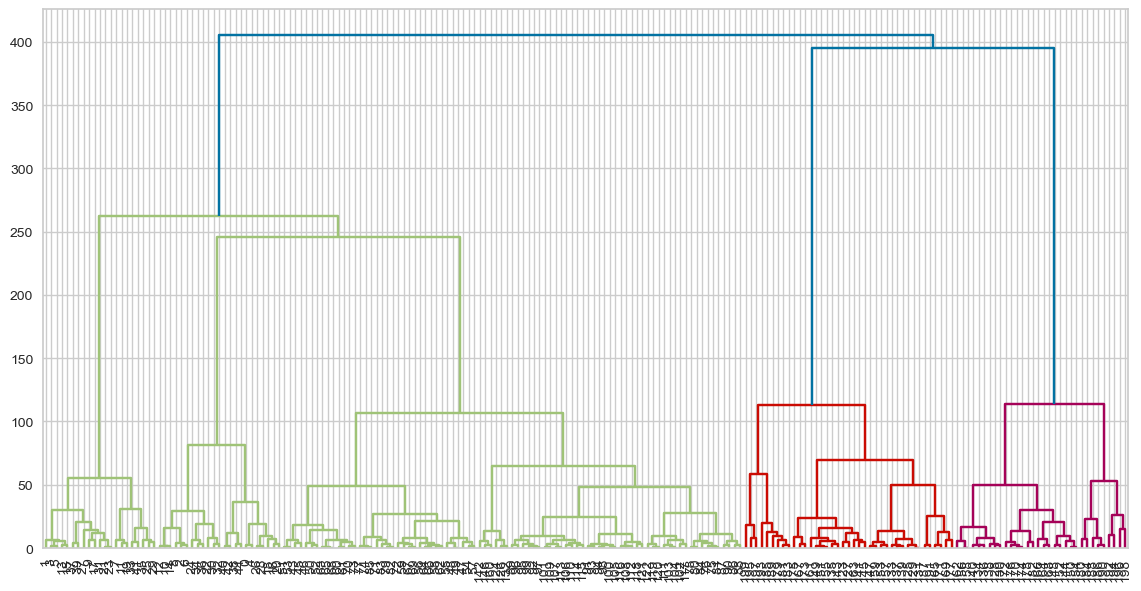

In [126]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward_X2, leaf_font_size = 10);

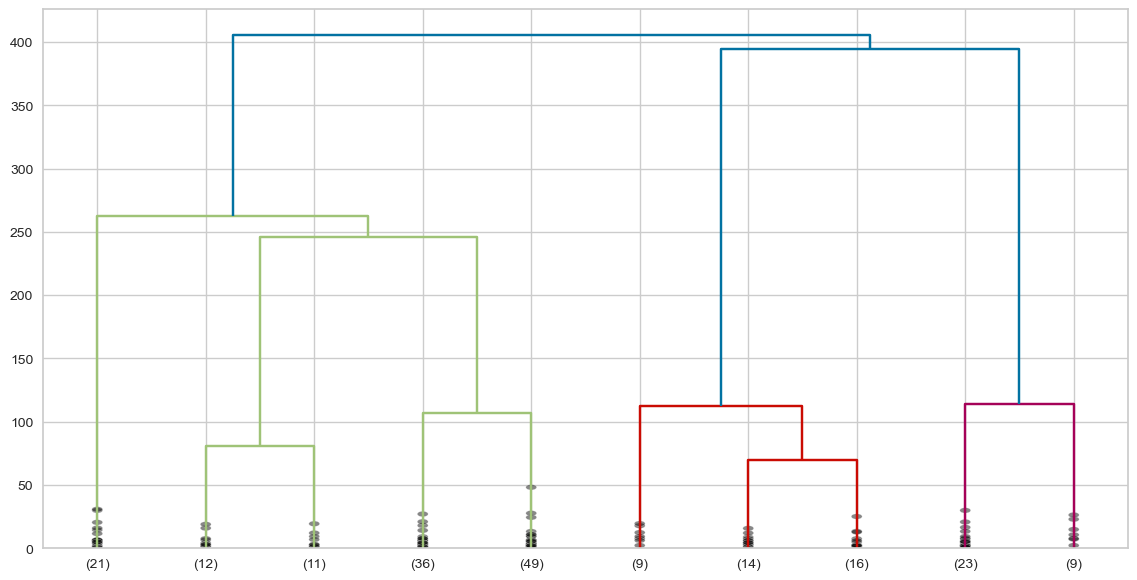

In [127]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward_X2,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

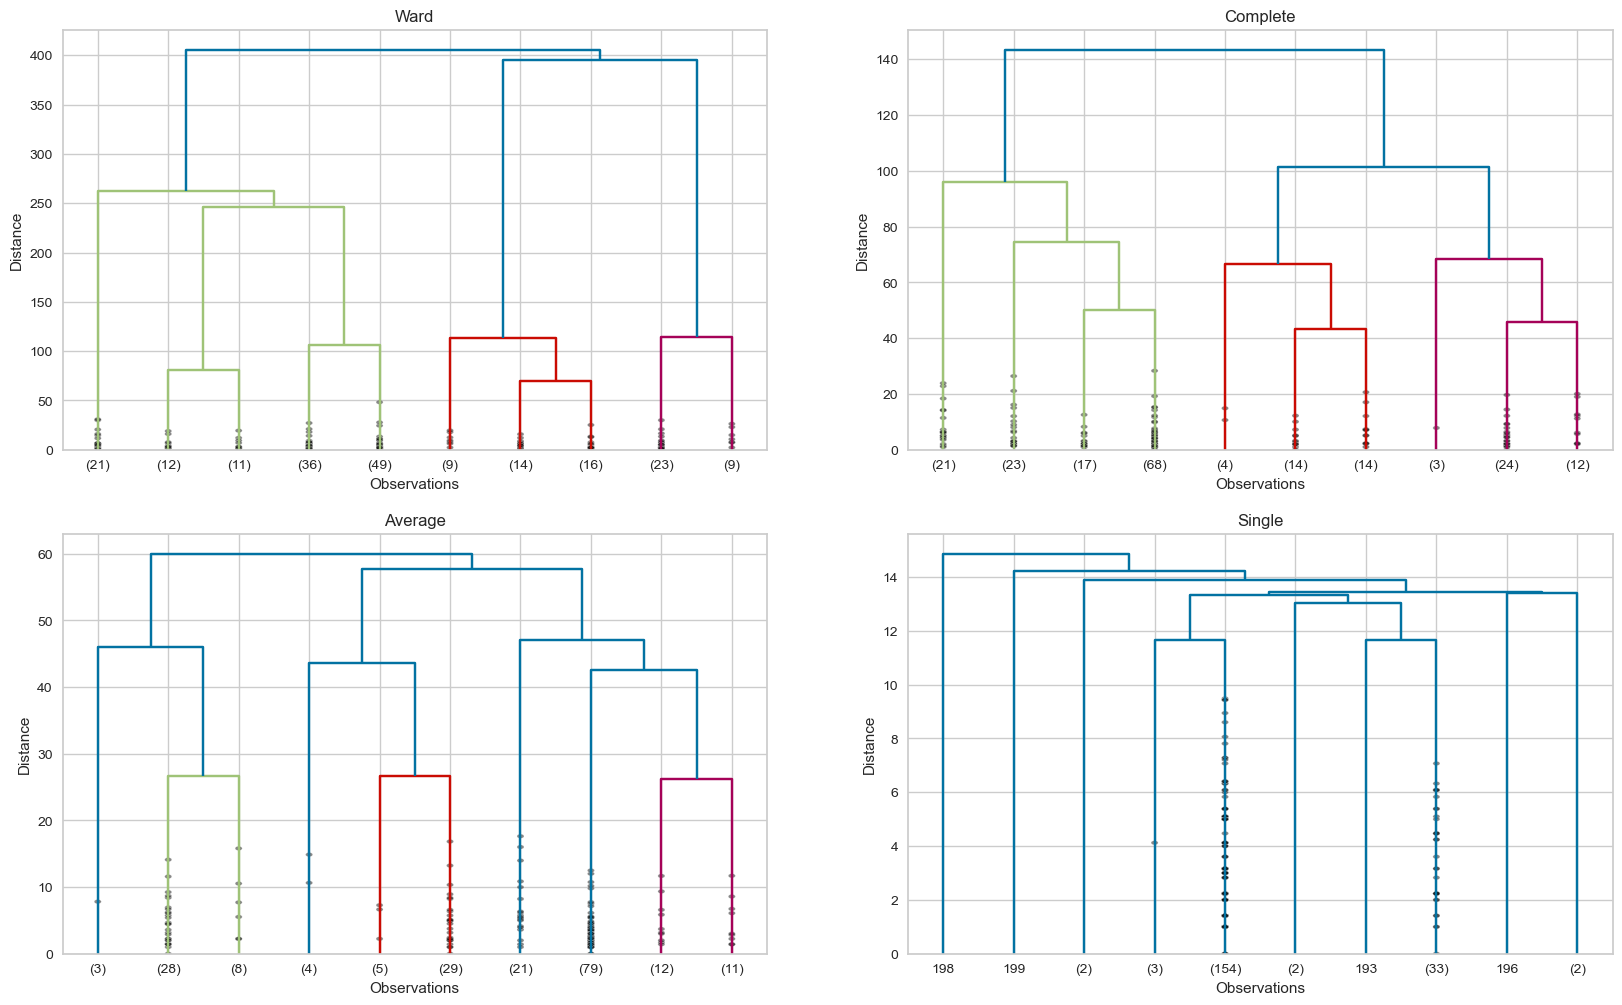

In [128]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_X2, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete_X2, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average_X2, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single_X2, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X1

In [140]:
from sklearn.cluster import AgglomerativeClustering

In [141]:
X1.head()

,Age,Spending_Score,cluster
0,19,39,0
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,0


In [144]:
model_agg_X1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
clusters_X1 = model_agg_X1.fit_predict(X1)
X1["cluster"] = clusters_X1

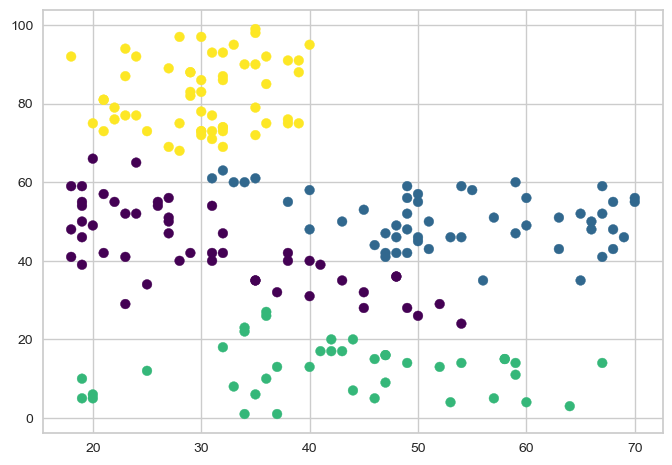

In [145]:
plt.scatter(X1.Age, X1.Spending_Score, c = clusters_X1, cmap = "viridis");

In [146]:
clus_pred_X1 = X1.groupby("cluster").mean().T
clus_pred_X1

cluster,0,1,2,3
Age,30.52,53.169811,42.650,30.175439
Spending_Score,43.62,50.452830,12.275,82.350877


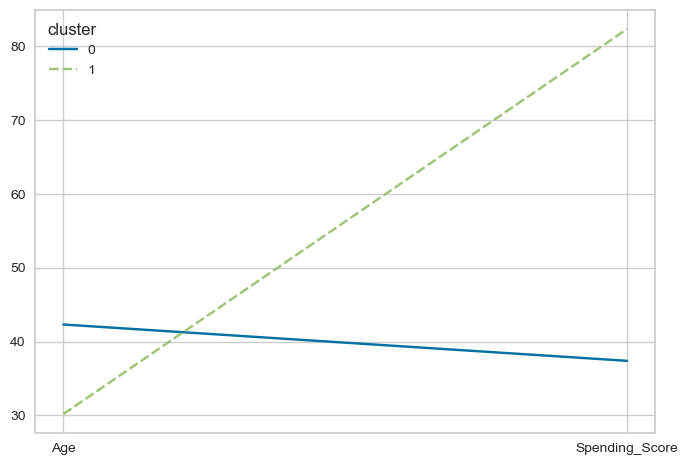

In [134]:
sns.lineplot(data = clus_pred_X1);

#### Annual Income and Spending Score- X2

In [135]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [147]:
model_agg_X2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
clusters_X2 = model_agg_X2.fit_predict(X2)
X2["cluster"] = clusters_X2

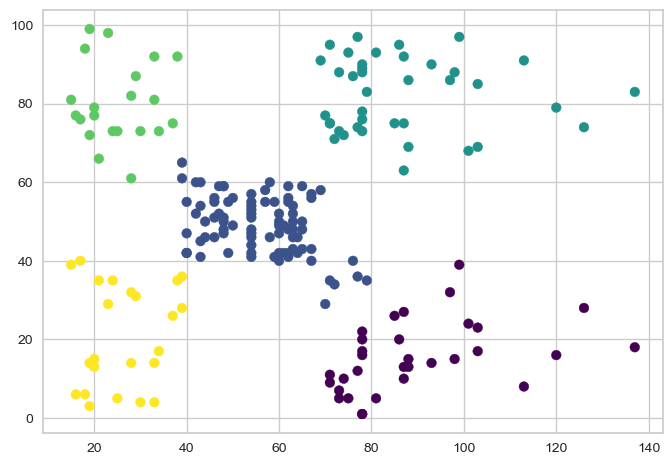

In [148]:
plt.scatter(X2.Annual_Income, X2.Spending_Score, c = clusters_X2, cmap = "viridis");

In [153]:
clus_pred_X2 = X2.groupby("cluster").mean().T
clus_pred_X2

cluster,0,1,2,3,4
Annual_Income,89.40625,55.811765,86.538462,25.095238,26.304348
Spending_Score,15.59375,49.129412,82.128205,80.047619,20.913043


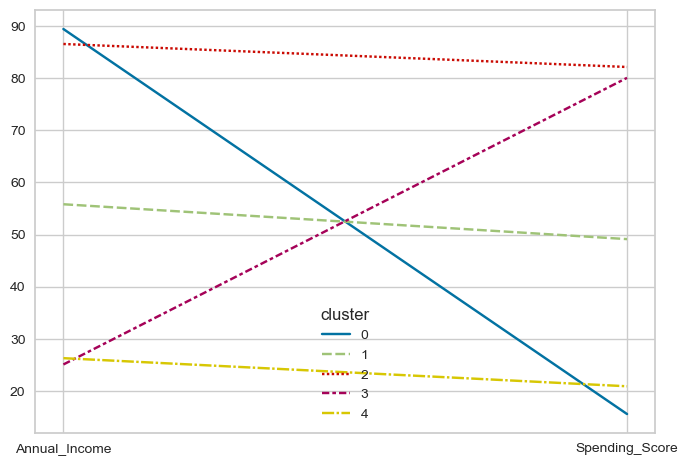

In [154]:
sns.lineplot(data = clus_pred_X2);

In [156]:
clus_pred_X2

cluster,0,1,2,3,4
Annual_Income,89.40625,55.811765,86.538462,25.095238,26.304348
Spending_Score,15.59375,49.129412,82.128205,80.047619,20.913043


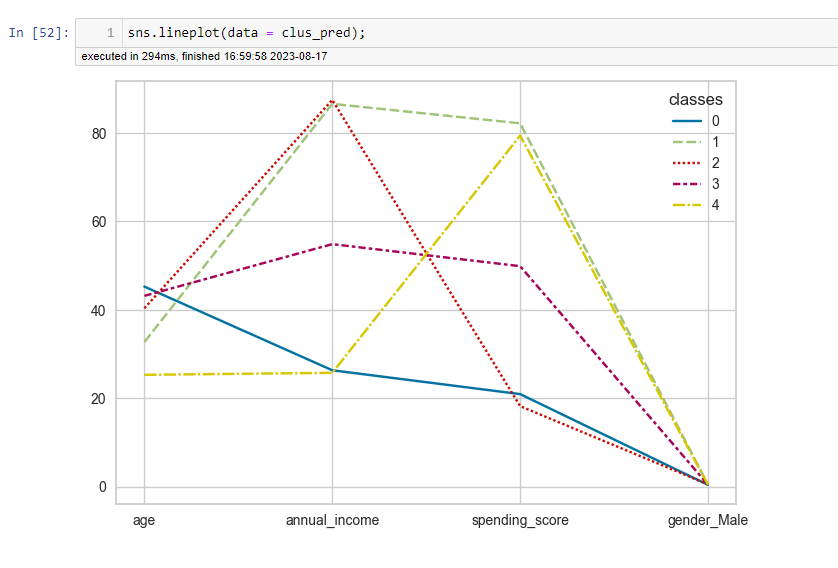

In [150]:
X1.sample(10)

,Age,Spending_Score,cluster
130,47,9,2
134,20,5,2
82,67,41,1
68,19,59,0
42,48,36,0
77,40,48,1
70,70,55,1
20,35,35,0
193,38,91,3
12,58,15,2


## Conclusion

In [178]:
#Please create your conclusion part subjectively.

### 2.4.11 ii. Agglomerative Clustering

**Age and Spending Score- X1:**: Four clusters were identified based on Age and Spending Score.
- Observations:
    - Younger individuals (average age around 30) have varied spending patterns: some have a moderate spending score (around 43.62), while others spend more freely with an average score of 82.35.
    - Middle-aged individuals (average age around 42.65) tend to be more conservative in their spending, with an average score of just 12.28.
    - Older individuals (average age around 53.17) have a moderate spending behavior with an average score of 50.45.

**2.4.11.2 Annual Income and Spending Score- X2:** Five clusters were identified based on Annual Income and Spending Score.
- Observations:
    - Individuals with a high annual income (around 86.54 and 89.41) have different spending behaviors. Some spend very conservatively (average score of 15.59), while others are big spenders (average score of 82.13).
    - People with a moderate annual income (around 55.81) have a moderate spending behavior with an average score of 49.13.
    - Interestingly, those with a lower annual income (around 25.10 and 26.30) also show varied spending patterns. Some have a high spending score (around 80.05), indicating they might be living beyond their means, while others are more conservative with an average score of 20.91.

Overall, the Agglomerative Clustering results provide valuable insights into the spending behaviors of different age groups and income levels. This information can be beneficial for businesses in understanding their customer base and tailoring their marketing strategies accordingly.